## Titanic DataSet from Kaggle

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
numerical_features = [feature for feature in train.columns if train[feature].dtype != 'O']

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation**

- Some of the data is missing in the column **Age**

In [16]:
print(train.shape)
print(test.shape)
print("Total passengers: ", train['PassengerId'].count() + test['PassengerId'].count())

(891, 12)
(418, 11)
Total passengers:  1309


**Observation**

- About 891 passengers data is used for training.
- About 418 passengers data is used for testing.

In [17]:
print(train['Survived'].value_counts())
print("Total passengers survived percent: ", (train['Survived'].sum() / train['Survived'].count()) * 100)



Survived
0    549
1    342
Name: count, dtype: int64
Total passengers survived percent:  38.38383838383838


- Only about 38% of the passengers survived the disaster.

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


- 1st class: 216
- 2nd class: 184
- 3rd class: 491    


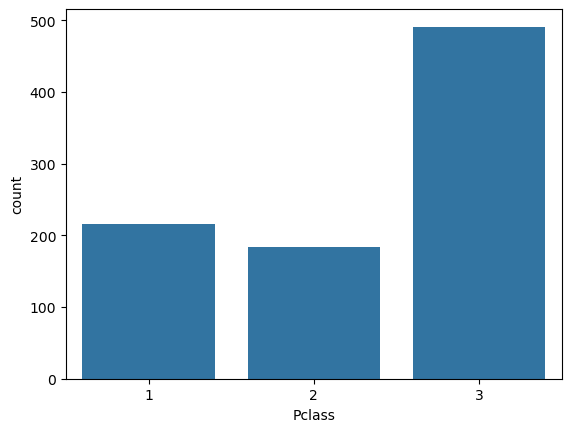

In [ ]:
sns.countplot(x='Pclass', data=train)
plt.show()

- We can see the majority of the passengers are in the 3rd class.

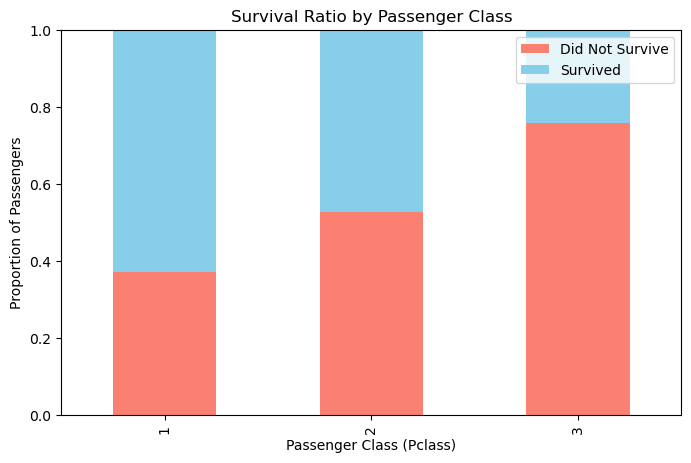

In [25]:
#relationship between the Pclass and survived normalized data
survival_table = pd.crosstab(train['Pclass'], train['Survived'], normalize='index')
survival_table.columns = ['Did Not Survive', 'Survived']

# Plot stacked bar chart
survival_table.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8,5))
plt.title("Survival Ratio by Passenger Class")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Proportion of Passengers")
plt.legend(loc='upper right')
plt.ylim(0,1)
plt.show()


- pd.crosstab(..., normalize='index') converts counts to ratios per row (here per Pclass).
- We can clearly see that the `survival rate` depends on the `Pclass` of the passengers the higher the Pclass the higher the survival rate

In [26]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

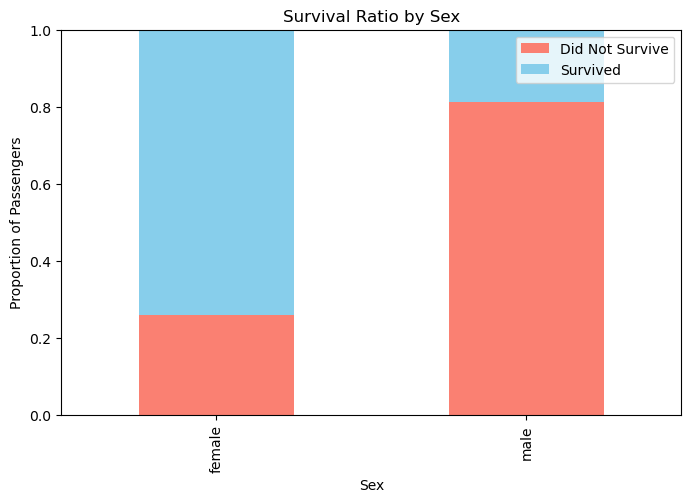

In [27]:
#plot between the Sex and survived normalized data
survival_table = pd.crosstab(train['Sex'], train['Survived'], normalize='index')
survival_table.columns = ['Did Not Survive', 'Survived']

# Plot stacked bar chart
survival_table.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8,5))
plt.title("Survival Ratio by Sex")
plt.xlabel("Sex")
plt.ylabel("Proportion of Passengers")
plt.legend(loc='upper right')
plt.ylim(0,1)
plt.show()

In [28]:
survival_table

,Did Not Survive,Survived
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


- We can clealy see that the 74% of females survived and the 18% of males survive
- We can also see that the 25% of females did not survive and the 81% of males did not survive
- Womens are more likely to survive as compared to mens

In [29]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

- SibSp indicates the number of siblings and/or spouses a passenger had on the Titanic.
    - SibSp = 0 → the passenger was traveling alone (no siblings or spouse aboard).
    - SibSp = 1 → the passenger had 1 sibling or 1 spouse on the ship.
    - SibSp = 3 → the passenger had 3 siblings and/or spouses aboard.


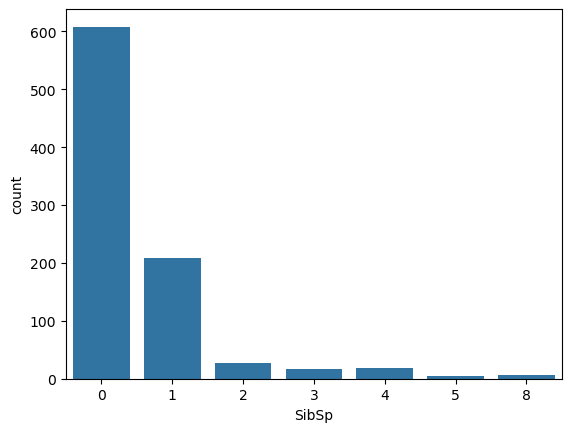

In [31]:
sns.countplot(x='SibSp', data=train)
plt.show()

In [35]:
#proportion of each value count of the SibSp
sibsp_proportions = train['SibSp'].value_counts(normalize=True) *100
print(sibsp_proportions)

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: proportion, dtype: float64


- We can see that most of the passengers were travelling along around 68%
- And about 23% was travelling with spouse or sibling


In [37]:
#proportion of each sibling or spouse
survival_table = pd.crosstab(train['SibSp'], train['Survived'], normalize='index')
survival_table.columns = ['Did Not Survive', 'Survived']   
survival_table 

,Did Not Survive,Survived
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


- People who travelled along with 1 sibling or spouse had a higher survival rate
- Higher the number of siblings or spouses the lower the survival rate
- Survival rate for the people that has 5 or more siblings or spouse is 0 

In [40]:
#relationship between class and Sipb
Pclass_survival_table = pd.crosstab(train['Pclass'], train['SibSp'], normalize='index')
Pclass_survival_table.columns = ['0 Siblings', '1 Sibling', '2 Siblings', '3 Siblings', '4 Siblings', '5 Siblings', '8 Siblings']
Pclass_survival_table

,0 Siblings,1 Sibling,2 Siblings,3 Siblings,4 Siblings,5 Siblings,8 Siblings
Pclass,,,,,,,
1,0.634259,0.328704,0.023148,0.013889,0.00000,0.000000,0.000000
2,0.652174,0.298913,0.043478,0.005435,0.00000,0.000000,0.000000
3,0.714868,0.169043,0.030550,0.024440,0.03666,0.010183,0.014257


- Pclass 3 has the people that are more likely to have siblings more than 3, Pclass 1 has the people that are more likely to have siblings less than 3

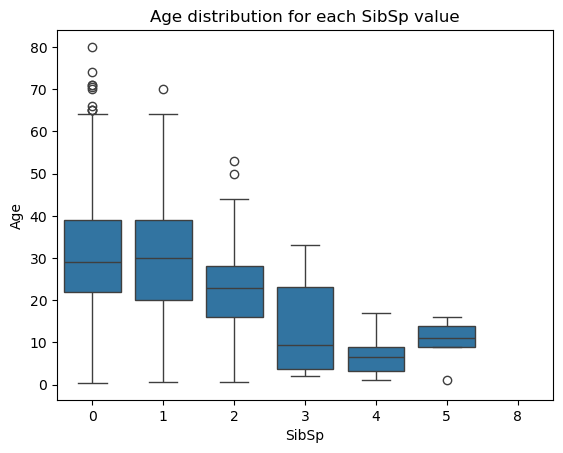

In [42]:
sns.boxplot(x='SibSp', y='Age', data=train)
plt.title('Age distribution for each SibSp value')
plt.show()

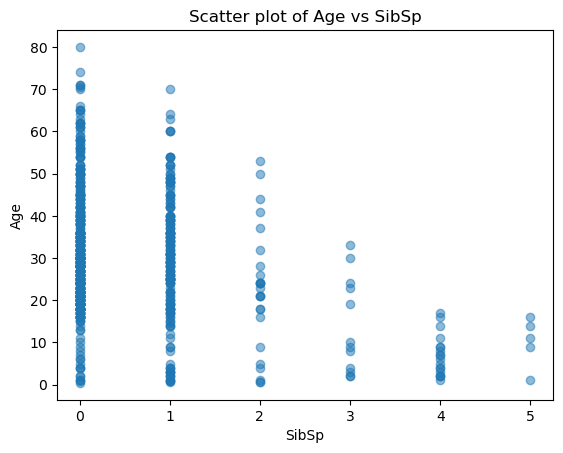

In [43]:
plt.scatter(train['SibSp'], train['Age'], alpha=0.5)
plt.xlabel('SibSp')
plt.ylabel('Age')
plt.title('Scatter plot of Age vs SibSp')
plt.show()


- 4 and 5 has the age range from 0 to 20 which means they were children/teenagers
- 0 has the variation of the range from 0 to 80 


In [44]:
train['Age'].isna().sum()

177

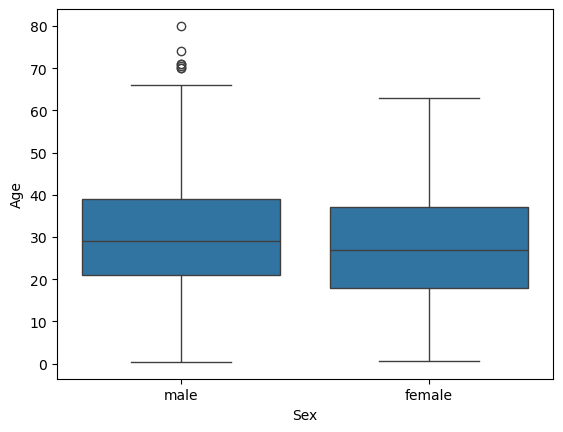

In [46]:
#box plot for age and sex
sns.boxplot(x='Sex', y='Age', data=train)
plt.show()

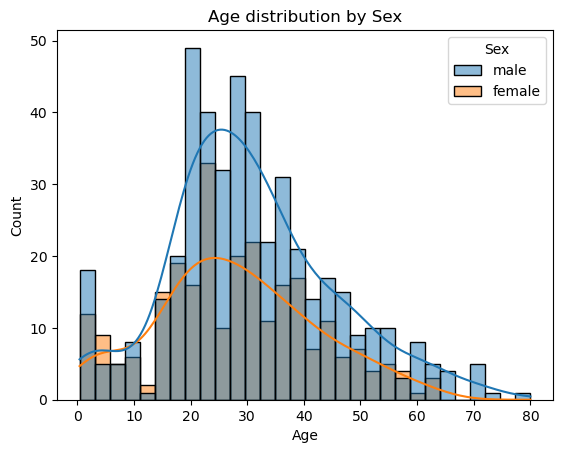

In [48]:
sns.histplot(data=train, x='Age', hue='Sex', kde=True, bins=30)
plt.title('Age distribution by Sex')
plt.show()


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

- Parch is the number of parents or children
- 0 is no parents or children
- 1 is 1 parent or child


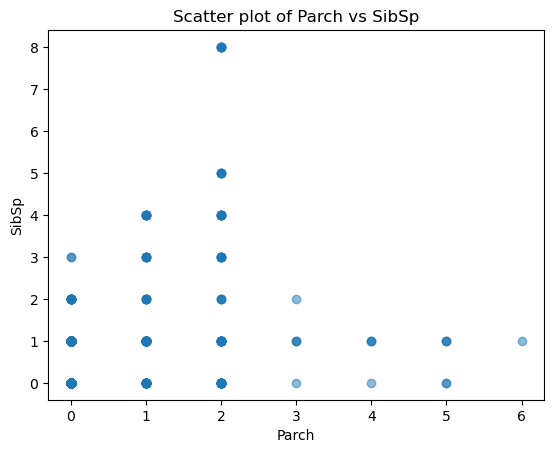

In [61]:
#Scatter plot of parch and Sibp
plt.scatter(train['Parch'], train['SibSp'], alpha=0.5)
plt.xlabel('Parch')
plt.ylabel('SibSp')
plt.title('Scatter plot of Parch vs SibSp')
plt.show()

Survival rate by SibSp:
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival rate by Parch:
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


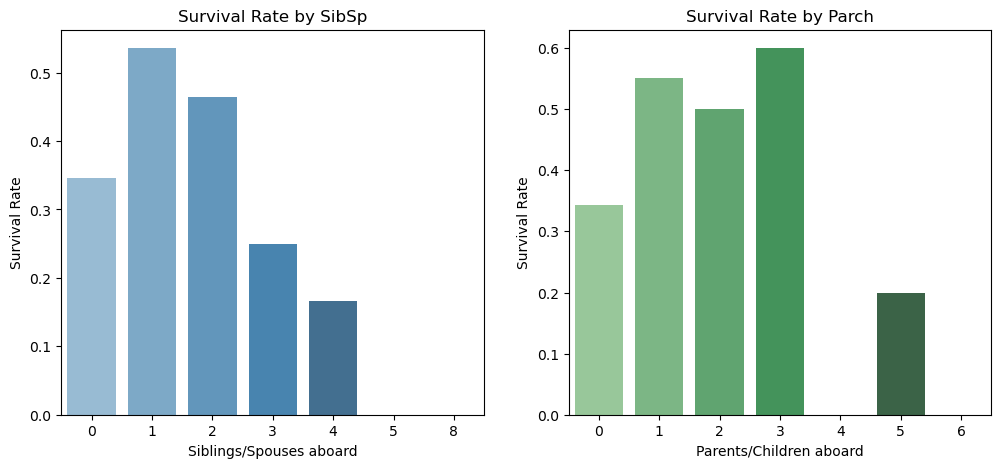

In [65]:
sibsp_survival = train.groupby('SibSp')['Survived'].mean()
print("Survival rate by SibSp:\n", sibsp_survival)

# Calculate survival rate by Parch
parch_survival = train.groupby('Parch')['Survived'].mean()
print("\nSurvival rate by Parch:\n", parch_survival)

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=sibsp_survival.index, y=sibsp_survival.values, ax=axes[0], palette="Blues_d")
axes[0].set_title('Survival Rate by SibSp')
axes[0].set_xlabel('Siblings/Spouses aboard')
axes[0].set_ylabel('Survival Rate')

sns.barplot(x=parch_survival.index, y=parch_survival.values, ax=axes[1], palette="Greens_d")
axes[1].set_title('Survival Rate by Parch')
axes[1].set_xlabel('Parents/Children aboard')
axes[1].set_ylabel('Survival Rate')

plt.show()

In [69]:
# Create a new column 'FamilySize'
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Check the first few rows
train[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


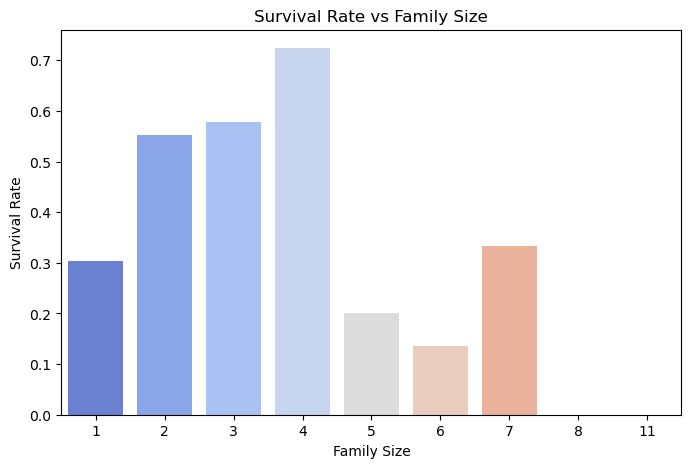

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=train, ci=None, palette='coolwarm')
plt.title('Survival Rate vs Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

- People with the family size of 4 has mostly survived but most of the passengers were travelling alone 

In [68]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


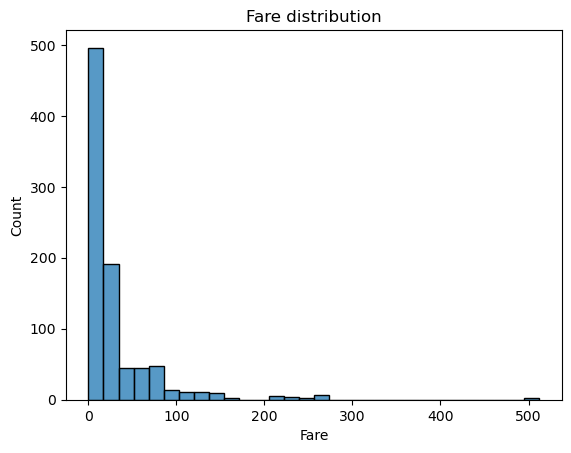

In [72]:
# histogram for Fare
sns.histplot(data=train, x='Fare', bins=30)
plt.title('Fare distribution')
plt.show()

- Most of the fare is between 0 to 100 and only few are above 500

In [74]:
train[train['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


- People who has the fare greater than 300 has survived and they were travelling alone , so this is a possible outlier
- THey are also in the 1st class which is the most expensive class

In [76]:
train[(train['Fare']<300) & (train['Fare']>200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,2
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,2
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,3
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [79]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [80]:
#Embarked and survived

survival_table = pd.crosstab(train['Embarked'], train['Survived'], normalize='index')
survival_table.columns = ['Did Not Survive', 'Survived']

In [81]:
survival_table

,Did Not Survive,Survived
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


Text(0.5, 1.0, 'Survival Ratio by Embarked')

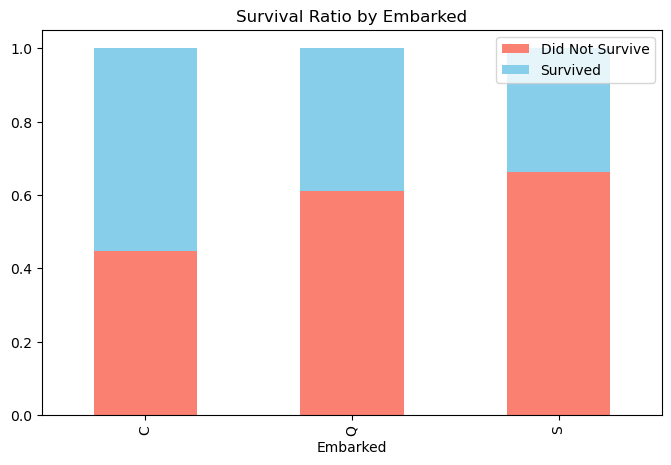

In [82]:
#Make a plot

survival_table.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8,5))
plt.title("Survival Ratio by Embarked")

In [84]:
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

- Contains many decimal values as well which is not acceptable for the age as it is a whole number

In [88]:
train['Age'] = np.floor(train['Age'])

In [89]:
train['Age'].value_counts()

Age
24.0    31
22.0    27
28.0    27
30.0    27
18.0    26
        ..
66.0     1
53.0     1
80.0     1
12.0     1
74.0     1
Name: count, Length: 71, dtype: int64

In [94]:
numeric_features = train.select_dtypes(include=['int64', 'float64'])
age_corr = numeric_features.corr()['Age'].sort_values(ascending=False)
print(age_corr)

Age            1.000000
Fare           0.096288
PassengerId    0.036982
Survived      -0.077151
Parch         -0.189307
FamilySize    -0.301834
SibSp         -0.307947
Pclass        -0.369450
Name: Age, dtype: float64


- SibSp and Pclass is more likely to have a moderate negative correlation so we can use these features to fill the age column but we havent encoded the categorical features yet so let's see what will happen after that

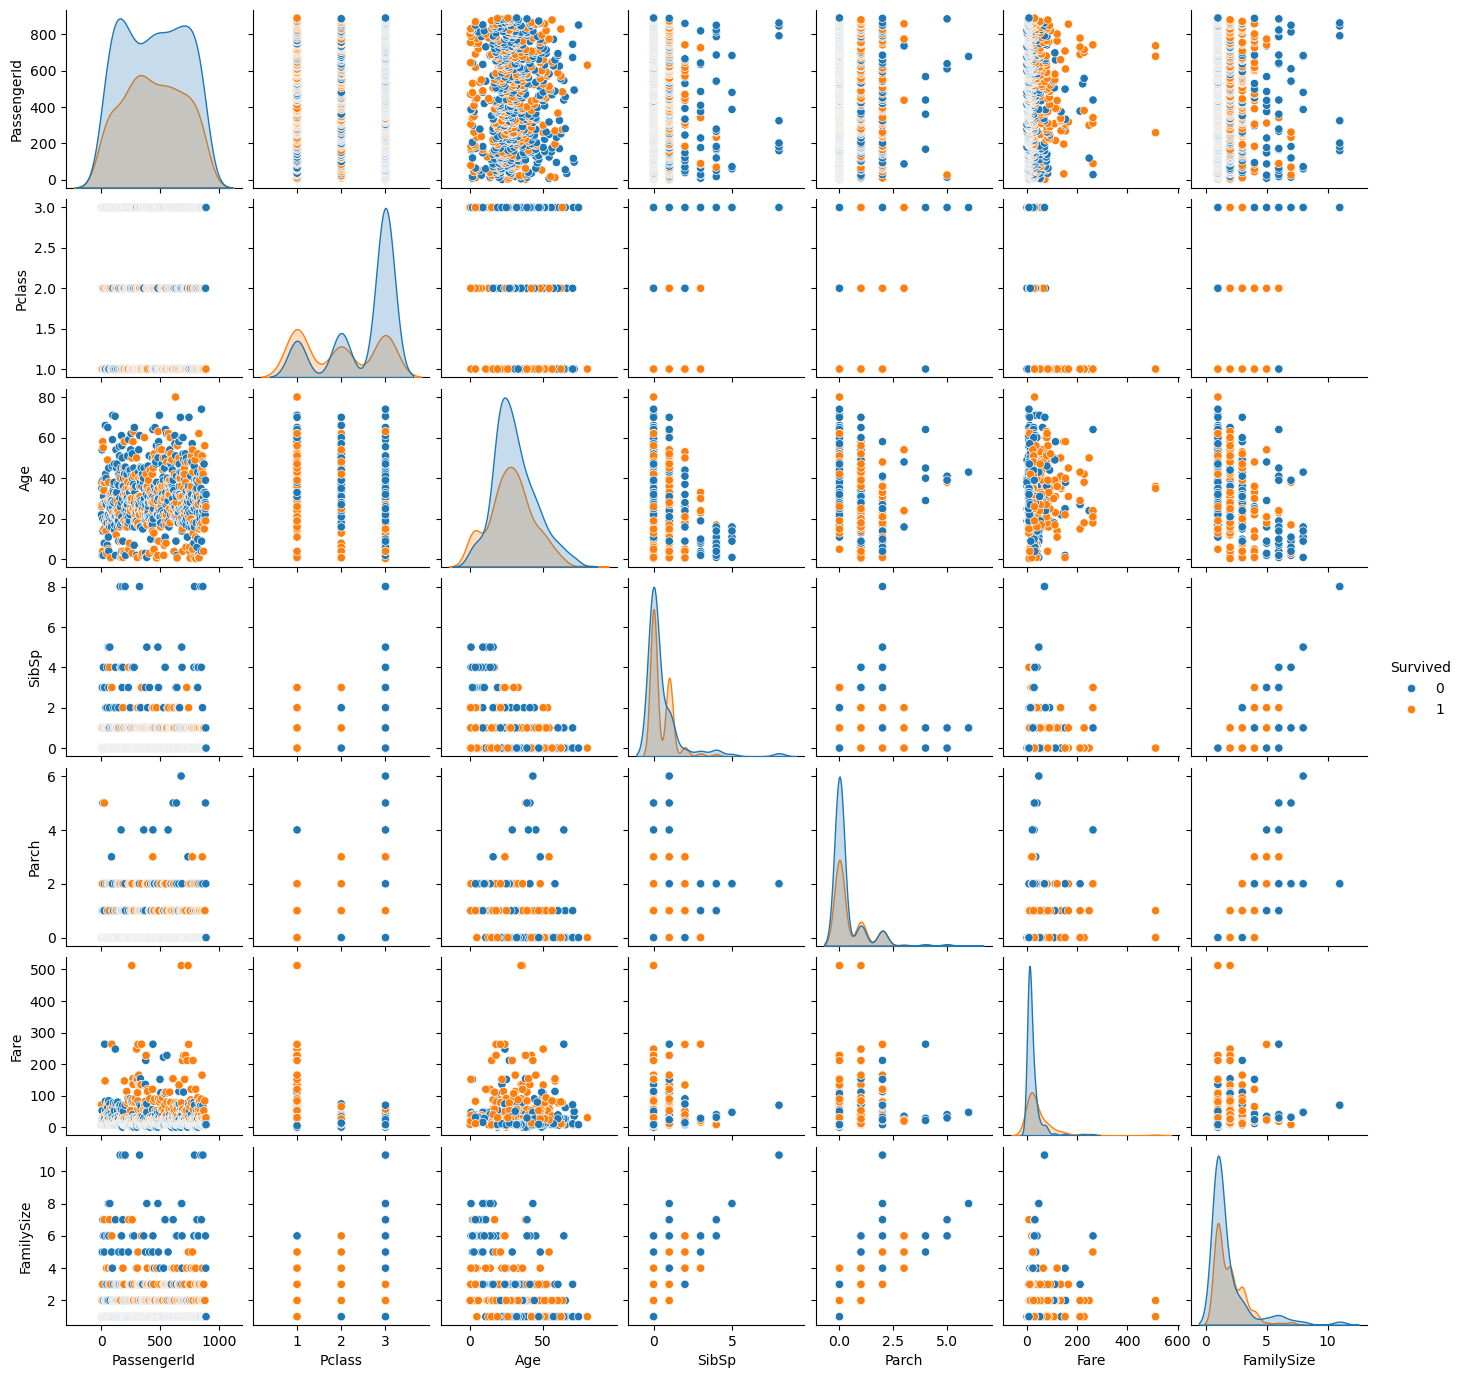

In [83]:
sns.pairplot(train, hue='Survived', size=2)
plt.show()

### Trying to fill the missing `Age` Column

In [95]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1


- 177 are missing ages

In [96]:
train[train['Age'].isna() & (train['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,1
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1


- Most of the people that are missing their age are men. (around 70%)
- We can see that the most of the people whose age is missing are the males that means that there must be some correaltion between them so we encode the sex column

In [112]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

- Male is mapped to 0 and female is mapped to 1. Lets see the correlation again

In [115]:
numeric_features = train.select_dtypes(include=['int64', 'float64'])
age_corr = numeric_features.corr()['Age'].sort_values(ascending=False)
print(age_corr)

Age            1.000000
Fare           0.096288
PassengerId    0.036982
Survived      -0.077151
Sex           -0.092753
Parch         -0.189307
FamilySize    -0.301834
SibSp         -0.307947
Pclass        -0.369450
Name: Age, dtype: float64


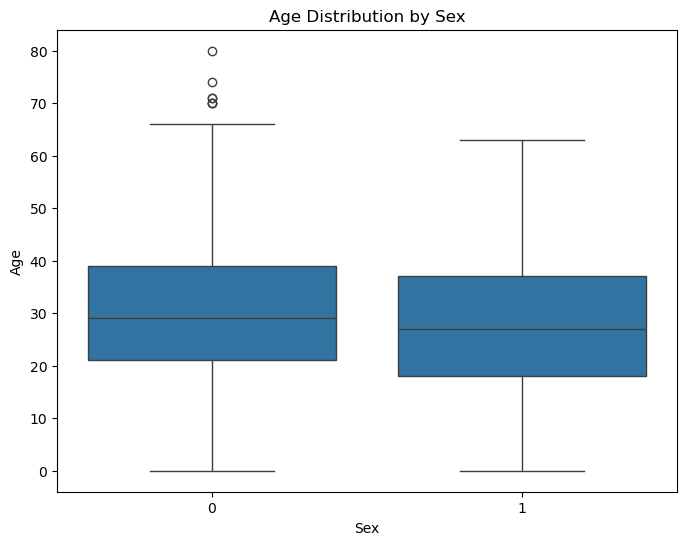

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Age', data=train)
plt.title('Age Distribution by Sex')
plt.show()


In [122]:
train[(train["Age"]>60) & (train['Sex'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
33,34,0,2,"Wheadon, Mr. Edward H",0,66.0,0,0,C.A. 24579,10.5000,NaN,S,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C,2
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C,1
116,117,0,3,"Connors, Mr. Patrick",0,70.0,0,0,370369,7.7500,NaN,Q,1
170,171,0,1,"Van der hoef, Mr. Wyckoff",0,61.0,0,0,111240,33.5000,B19,S,1
252,253,0,1,"Stead, Mr. William Thomas",0,62.0,0,0,113514,26.5500,C87,S,1
280,281,0,3,"Duane, Mr. Frank",0,65.0,0,0,336439,7.7500,NaN,Q,1
326,327,0,3,"Nysveen, Mr. Johan Hansen",0,61.0,0,0,345364,6.2375,NaN,S,1
438,439,0,1,"Fortune, Mr. Mark",0,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
456,457,0,1,"Millet, Mr. Francis Davis",0,65.0,0,0,13509,26.5500,E38,S,1


- Most of the people that are male and older than 60 died there survival rate is very low

In [100]:
train[train['Age'].isna() & (train['Sex'] == 'male') & (train['Pclass'] == 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S,1
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1


- They are also in the 3rd class

In [108]:
train[train['Age'].isna() & (train['Sex'] == 'male') & (train['Pclass'] == 3) & (train['SibSp'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C,1
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S,1
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1


- Most of them has the family size of 1 that means they are travelling alone

- We can impute the missing values with the median pclass and SibSp of the passengers for the age column\


In [124]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

- About 80% of the data is missing so we can drop it